# Judul: "Precision Timber Scouting: Identifikasi Zona Kayu Komersial Bernilai Tinggi (High-Value Timber) Menggunakan Machine Learning 

## A. Business Understanding

## B. Data Understanding and Cleaning

### B.1 Import Library and Read Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

try:
 df = pd.read_csv("covtype.csv")
 print("Berhasil Membaca Data")
except Exception as e:
 print(f"Gagal Membaca Data as {e}")

Berhasil Membaca Data


### B.2 Read 5 Data Teratas dan Terbawah

In [2]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,1,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,1,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,1,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,1,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,1,0,3


### B.3 Melihat informasi Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

### B.4 Cek Dimensi Dataset

In [5]:
df.shape

(581012, 55)

### B.5 Cek Nilai Yang Hilang

In [6]:
missing = df.isnull().sum()
missing  = missing[missing > 0]

missing

Series([], dtype: int64)

In [7]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0
Soil_Type12                           0
Soil_Type13                           0
Soil_Type14                           0


In [8]:
missing_val = df.isnull().mean() * 100
missing_val = missing_val[missing_val > 0].sort_values()

if not missing_val.empty:
 plt.figure(figsize=(10, 8))
 ax = missing_val.plot(kind = 'barh', color = 'tomato', zorder = 2)

 plt.title("Quality Check: Apakah Ada Nilai Missing Yang Melebihi Thresholdd??", fontsize = 14, fontweight = 'bold', loc = 'left')
 plt.xlabel("Presentase (%)")
 plt.axvline(x = 50, color = 'black', linestyle = '--', alpha = 0.5)
 plt.text(52, 0, 'Batas Toleransi Kehilangan (50%)', color = 'black', va = 'center')
 plt.grid(axis = 'x', linestyle = '--', alpha = 0.3)

 plt.show()
else:
 print('Datanya Udah Bersih')

Datanya Udah Bersih


### B.6 Cek Nilai Duplikasi Dataset

In [9]:
df.duplicated().sum()

np.int64(0)

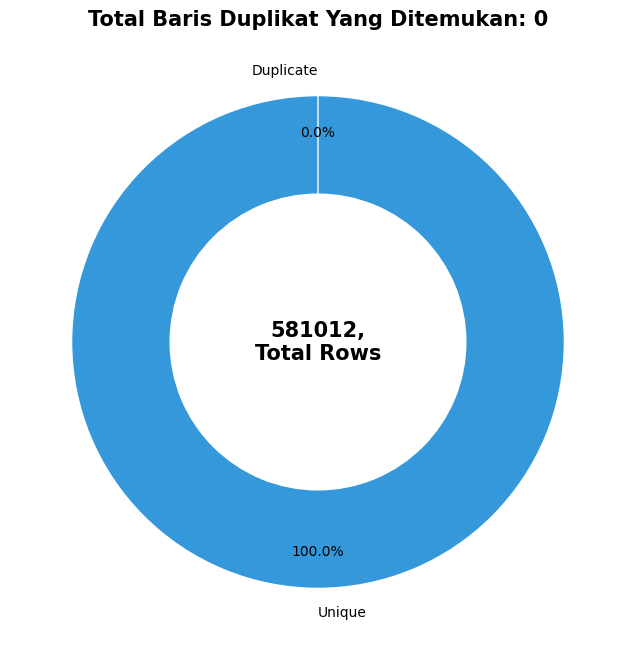

In [10]:
n_dup = df.duplicated().sum()
sizes = [len(df) - n_dup, n_dup]

plt.figure(figsize=(10, 8))
color = ["#3498db", "tomato"]

plt.pie(sizes, colors= color, labels = ['Unique', 'Duplicate'], autopct="%1.1f%%",
        startangle=90, pctdistance = 0.85, wedgeprops = {'width' : 0.4, 'edgecolor' : 'white'})

plt.text(0, 0, f"{len(df):},\nTotal Rows", va = 'center', ha = 'center', fontsize = 15, fontweight = 'bold' )
plt.title(f"Total Baris Duplikat Yang Ditemukan: {n_dup}", fontsize = 15, fontweight = 'bold')

plt.show()


### B.7 Cek Statistik Data

In [11]:
# Pilih statistik yang bisa diceritakan saja
stats_cols = ['count', 'mean', '50%', 'min', 'max']

# Bikin Tabel Storytelling
summary_table = (
    df.describe().T[stats_cols]             # 1. Ambil 5 kolom kunci
    .rename(columns={'50%': 'Median'})      # 2. Ganti nama biar manusiawi
    .style
    .format("{:.2f}")                       # 3. Buang desimal kepanjangan
    .background_gradient(cmap='Blues', subset=['mean', 'Median']) # 4. Highlight Rata-rata vs Median aja
    .set_caption("Ringkasan Statistik Utama (Cek Gap antara Mean & Median)")
)

summary_table

,count,mean,Median,min,max
Elevation,581012.00,2959.37,2996.00,1859.00,3858.00
Aspect,581012.00,155.66,127.00,0.00,360.00
Slope,581012.00,14.10,13.00,0.00,66.00
Horizontal_Distance_To_Hydrology,581012.00,269.43,218.00,0.00,1397.00
Vertical_Distance_To_Hydrology,581012.00,46.42,30.00,-173.00,601.00
Horizontal_Distance_To_Roadways,581012.00,2350.15,1997.00,0.00,7117.00
Hillshade_9am,581012.00,212.15,218.00,0.00,254.00
Hillshade_Noon,581012.00,223.32,226.00,0.00,254.00
Hillshade_3pm,581012.00,142.53,143.00,0.00,254.00
Horizontal_Distance_To_Fire_Points,581012.00,1980.29,1710.00,0.00,7173.00


## C. Exploratory Data Analysis (EDA)

### C.1 Univariate Analysis

In [12]:
num = df.select_dtypes(include = 'number')

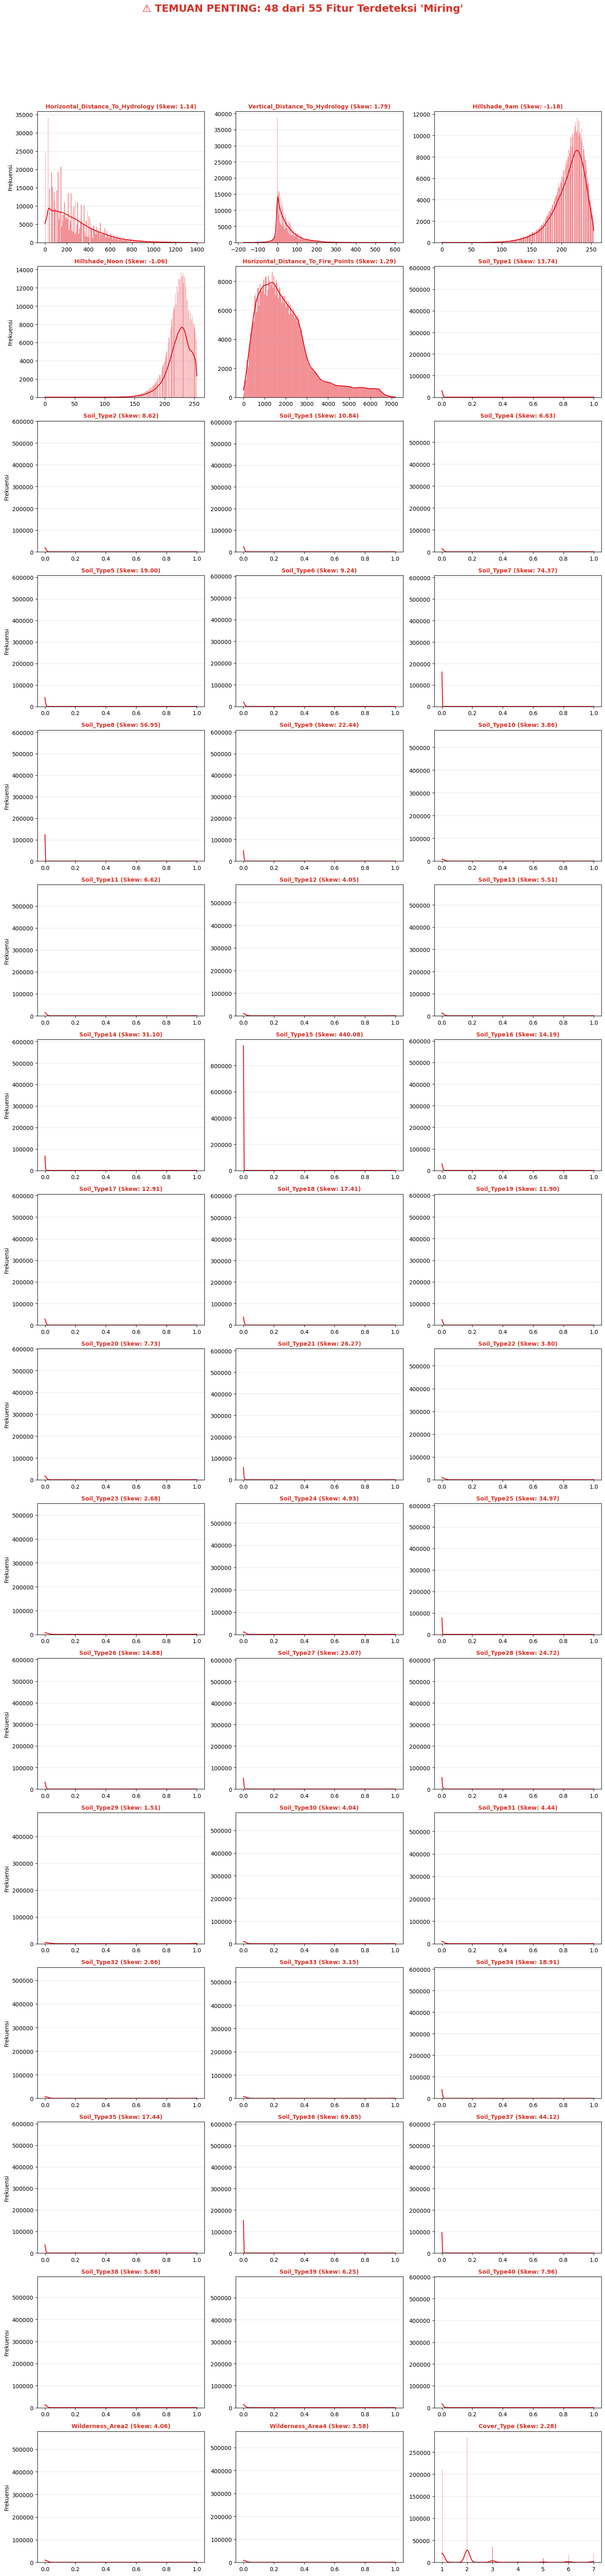

In [13]:
# --- CODE BLOCK: AUTOMATED INSIGHT GENERATOR ---

# 1. EXPLORATORY PHASE (Di balik layar)
# Komputer ngecek 55 kolom. Lo gak perlu plot semuanya.
skew_limit = 1
problematic_cols = [col for col in num.columns if abs(num[col].skew()) > skew_limit]

# 2. LOGIC PENENTU STORY
if len(problematic_cols) == 0:
    print("✅ HASIL SCANNING: Analisis pada 55 kolom menunjukkan distribusi NORMAL. Tidak ada tindakan diperlukan.")
else:
    # 3. EXPLANATORY PHASE (Visualisasi Mutiara)
    # Setup canvas cuma buat yang bermasalah
    n_features = len(problematic_cols)
    n_cols_row = 3
    n_rows = (n_features + n_cols_row - 1) // n_cols_row
    
    plt.figure(figsize=(15, 4 * n_rows))
    
    # Judul yang 'Ngomong'
    plt.suptitle(f"⚠️ TEMUAN PENTING: {n_features} dari {len(num.columns)} Fitur Terdeteksi 'Miring'", 
                 fontsize=18, fontweight='bold', y=0.99, color='#D93025')
    
    for i, col in enumerate(problematic_cols):
        plt.subplot(n_rows, n_cols_row, i + 1)
        sns.histplot(num[col], kde=True, color="#E50914", edgecolor='white') # Merah = Alert
        plt.title(f"{col} (Skew: {num[col].skew():.2f})", fontsize=10, fontweight='bold', color="#D93025")
        plt.xlabel('')
        plt.ylabel('Frekuensi' if i % 3 == 0 else '') # De-cluttering
        plt.grid(axis='y', alpha=0.3)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

## 🕵️‍♂️ AUTOMATED DATA AUDIT: Deteksi Dini "Skewness"

### 🎯 Objective (Tujuan)
Melakukan *screening* otomatis pada 55 fitur numerik untuk mendeteksi **Ketimpangan Distribusi (Skewness)** tanpa harus memvisualisasikan seluruh fitur secara manual. Efisiensi adalah kunci.

---

### ⚙️ Audit Mechanism (Cara Kerja)
1.  **Scanning:** Algoritma memindai nilai *skewness* setiap kolom.
2.  **Filtering:** Menggunakan ambang batas **(Threshold) > 1**.
    * `Skewness > 1` = Miring Kanan (Ekor memanjang ke kanan/Positif).
    * `Skewness < -1` = Miring Kiri (Ekor memanjang ke kiri/Negatif).
3.  **Reporting:** Hanya memvisualisasikan kolom yang melanggar batas tersebut (Masalah).

> **💡 Senior Note:**
> Data yang terlalu miring (*Highly Skewed*) bisa membuat model Machine Learning menjadi bias dan lambat belajar. Jika ditemukan, fitur ini adalah kandidat utama untuk **Log Transformation**.

---

### 📊 Visualization Logic
* **Warna Merah (#E50914):** Menandakan "Alert/Warning". Fitur ini memerlukan perhatian khusus.
* **Grid Line:** Membantu melihat seberapa jauh ekor distribusi (outliers) menjauh dari pusat data.

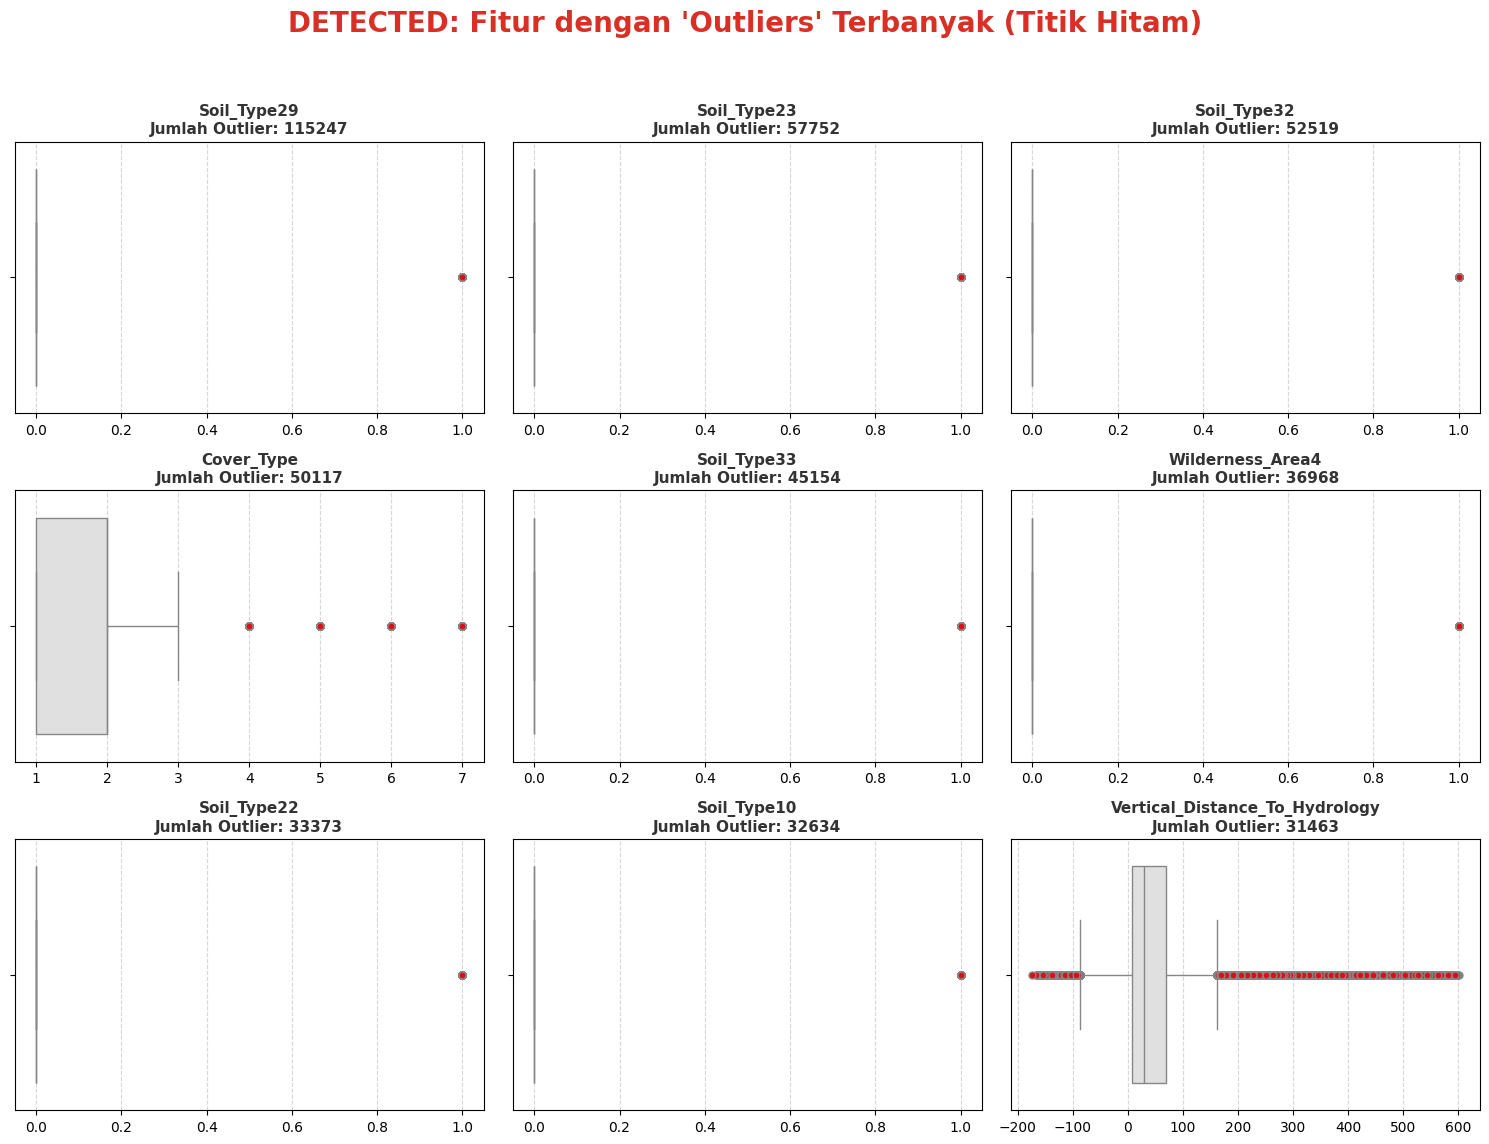

In [14]:
problematic_cols = []
for col in num.columns:
    Q1 = num[col].quantile(0.25)
    Q3 = num[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Hitung jumlah outlier
    outliers = ((num[col] < lower_bound) | (num[col] > upper_bound)).sum()
    if outliers > 0: # Kalau ada outlier, masukin list
        problematic_cols.append((col, outliers))

# Sortir biar yang outlier-nya paling banyak muncul duluan
problematic_cols.sort(key=lambda x: x[1], reverse=True)
top_problems = problematic_cols[:9] # Ambil Top 9 aja biar gak penuh

if len(top_problems) == 0:
    print("🎉 AMAN! Gak ada outlier ekstrem.")
else:
    # Setup Canvas
    n_cols_row = 3
    n_rows = (len(top_problems) + n_cols_row - 1) // n_cols_row
    plt.figure(figsize=(15, 4 * n_rows))
    
    plt.suptitle(f"DETECTED: Fitur dengan 'Outliers' Terbanyak (Titik Hitam)", 
                 fontsize=20, fontweight='bold', y=0.98, color='#D93025')

    for i, (col, count) in enumerate(top_problems):
        plt.subplot(n_rows, n_cols_row, i + 1)
        
        # Plot Boxplot (Horizontal biar enak baca labelnya)
        # Warna Box: Biru Tenang. Warna Outlier: Merah (Pake flierprops)
        sns.boxplot(x=num[col], color='#E0E0E0', 
                    flierprops=dict(marker='o', markerfacecolor='#E50914', markersize=5, linestyle='none'))
        
        plt.title(f"{col}\nJumlah Outlier: {count}", 
                  fontsize=11, fontweight='bold', color="#333333")
        plt.xlabel('')
        plt.grid(axis='x', linestyle='--', alpha=0.5)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## 🚨 ANOMALY DETECTION: Screening Outliers dengan Metode IQR

### 🎯 Objective (Tujuan)
Mengidentifikasi fitur-fitur yang memiliki nilai ekstrem (**Outliers**) terbanyak. Outlier adalah titik data yang menyimpang jauh dari mayoritas populasi dan berpotensi mengganggu performa model sensitif (seperti Linear Regression atau Neural Network).

---

### ⚙️ Audit Mechanism (Logika Statistik)
Kita menggunakan metode **Interquartile Range (IQR)** sebagai "pagar pembatas":
1.  **Hitung IQR:** Selisih antara Kuartil Atas (Q3/75%) dan Kuartil Bawah (Q1/25%).
2.  **Tentukan Batas Aman:**
    * **Batas Bawah:** $Q1 - 1.5 \times IQR$
    * **Batas Atas:** $Q3 + 1.5 \times IQR$
3.  **Deteksi:** Data apapun yang berada di luar pagar ini dianggap sebagai **Outlier**.

---

### 📊 Visualization Guide (Cara Baca Boxplot)
Visualisasi di bawah menampilkan **Top 9 Fitur** dengan outlier terbanyak:
* **Kotak Abu-abu (Box):** Menunjukkan di mana **50% data inti** berkumpul.
* **Garis (Whiskers):** Rentang data yang masih dianggap "Wajar".
* **Titik Merah (Dots):** Data **Outlier**.
    * Jika titik merah menumpuk sangat banyak (tebal), artinya fitur tersebut memiliki variasi ekstrem yang tinggi (contoh: Jarak ke titik api).

> **💡 Senior Advice:**
> Jangan buru-buru menghapus outlier! Dalam data hutan ini, outlier seringkali bukan "Error", melainkan **Fakta Alam**.
> * *Contoh:* Pohon yang tumbuh sangat jauh dari air (outlier jarak) mungkin adalah spesies kaktus/tanaman kering. Menghapusnya berarti menghilangkan informasi penting.

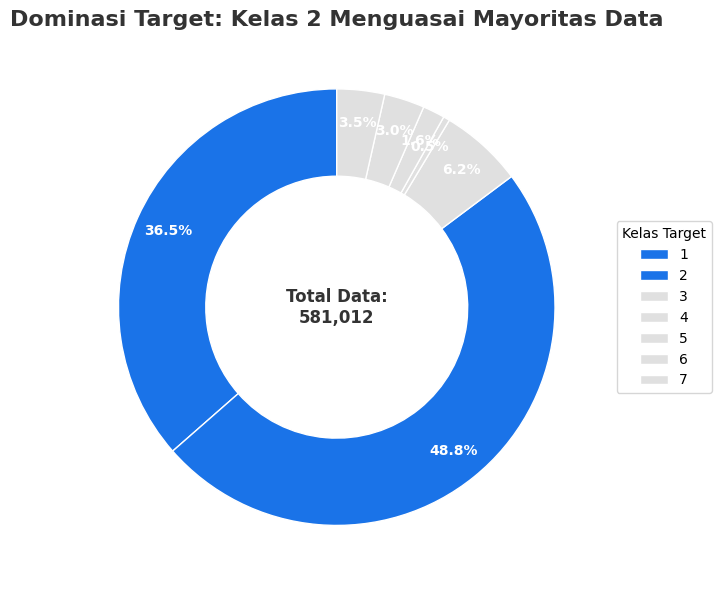

In [15]:
target_col = 'Cover_Type'
counts = df[target_col].value_counts().sort_index()
labels = counts.index
values = counts.values
num_classes = len(labels)

# --- 2. WARNA STORYTELLING (BAGIAN PENTING!) ---
# Tujuannya: Highlight 2 kelas TERBESAR, sisanya abu-abu.

# A. Bikin warna dasar abu-abu untuk SEMUA kelas
# Kita pake list comprehension biar cepet
final_colors = ['#E0E0E0'] * num_classes

# B. Cari tahu index mana yang nilainya paling gede
# argsort() mengurutkan dari kecil ke besar, lalu balikin indexnya.
# Kita ambil 2 index terakhir (terbesar).
top_2_indices = np.argsort(values)[-2:]

# C. Timpa warna abu-abu di index tersebut dengan warna highlight (Misal: Biru Google)
highlight_color = '#1A73E8'
for idx in top_2_indices:
    final_colors[idx] = highlight_color

# --- 3. PLOT (Tinggal ganti parameter 'colors') ---
plt.figure(figsize=(10, 6))

wedges, texts, autotexts = plt.pie(values, labels=None, autopct='%1.1f%%',
                                   startangle=90, pctdistance=0.85,
                                   colors=final_colors, # <--- PAKE WARNA BARU KITA
                                   wedgeprops=dict(width=0.4, edgecolor='white'))

# Styling persen biar kebaca di atas warna biru/abu
for text in autotexts:
    text.set_color('white')
    text.set_fontsize(10)
    text.set_weight('bold')

# Center Stage
plt.text(0, 0, f'Total Data:\n{sum(values):,}',
         ha='center', va='center', fontsize=12, fontweight='bold', color='#333333')

# Legenda Samping
plt.legend(wedges, labels,
           title="Kelas Target",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

# Judul yang lebih 'ngomong'
# Kita cari tau nama kelas terbesarnya buat ditaruh di judul
top_class_label = labels[np.argmax(values)]
plt.title(f"Dominasi Target: Kelas {top_class_label} Menguasai Mayoritas Data",
          fontsize=16, fontweight='bold', color='#333333')

plt.tight_layout()
plt.show()

## 🎯 TARGET BREAKDOWN: Dominasi Mayoritas vs Minoritas

### 🔍 Objective (Tujuan)
Memahami proporsi setiap kelas target (`Cover_Type`) untuk menentukan strategi modeling. Kita menggunakan **Donut Chart** dengan teknik *Color Highlighting* untuk memisahkan kelas mayoritas (Dominant) dengan kelas minoritas (Rare).

---

### 🎨 Visual Decoding (Cara Baca)
* **Warna Biru (#1A73E8):** Merepresentasikan 2 Kelas Terbesar (Major Classes). Ini adalah jenis pohon yang paling sering muncul di hutan.
* **Warna Abu-abu (#E0E0E0):** Merepresentasikan Kelas Minoritas. Kelompok ini adalah "Warga Kecil" yang seringkali diabaikan oleh model Machine Learning jika tidak ditangani dengan benar.
* **Sudut & Luas:** Semakin besar potongan donat, semakin banyak jumlah datanya.

> **💡 Senior Insight:**
> Jika area Biru mendominasi lebih dari 70-80% lingkaran, kita menghadapi masalah **Severe Class Imbalance**. Artinya, akurasi (Accuracy) bukan lagi metrik yang valid, karena model bisa "curang" dengan hanya menebak kelas biru saja.

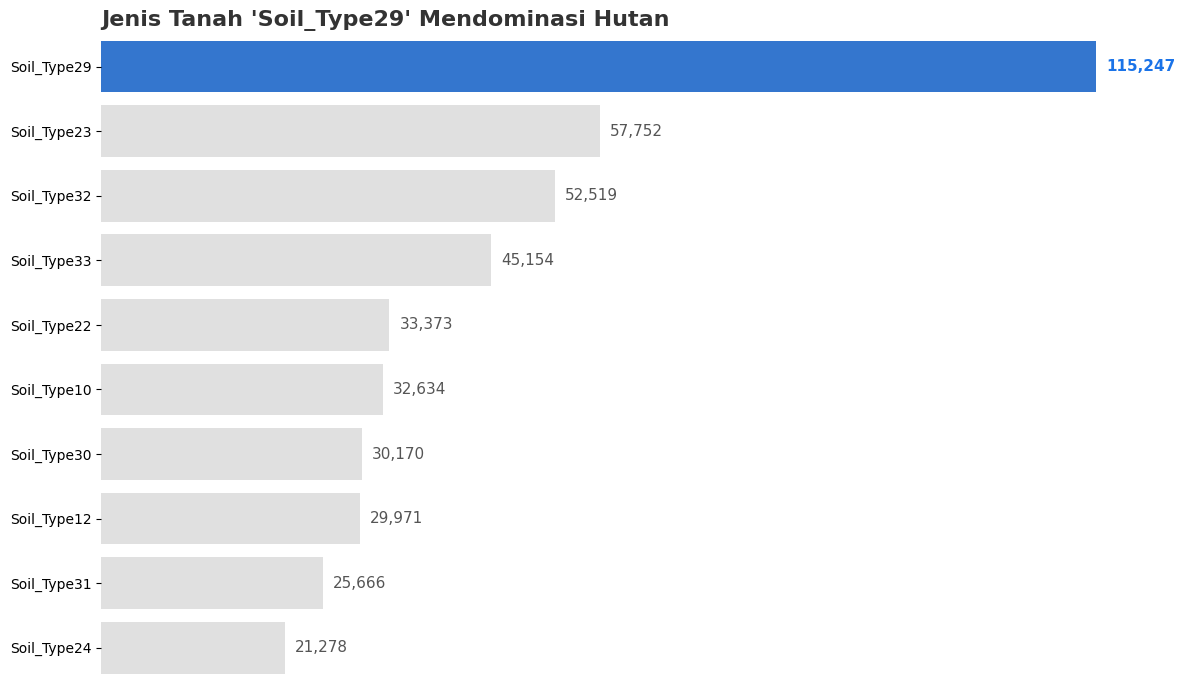

In [16]:
soil_cols = [col for col in df.columns if 'Soil_Type' in col]
df['Soil_Category'] = df[soil_cols].idxmax(axis=1)

# Ambil Top 10
soil_counts = df['Soil_Category'].value_counts().head(10).reset_index()
soil_counts.columns = ['Soil_Type', 'Frequency']

# --- 2. SETUP WARNA (Sama) ---
bar_colors = ['#E0E0E0' for _ in range(len(soil_counts))]
bar_colors[0] = '#1A73E8' # Juara 1 Biru

# --- 3. VISUALISASI (REVISI DI SINI) ---
plt.figure(figsize=(12, 7))

# FIX WARNING:
# Tambahkan `hue='Soil_Type'` dan `legend=False`
ax = sns.barplot(x='Frequency', y='Soil_Type', data=soil_counts, 
                 palette=bar_colors, 
                 hue='Soil_Type', legend=False) # <--- INI OBATNYA

# --- 4. DE-CLUTTERING ---
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.xticks([])

# --- 5. LABELING ---
for i, v in enumerate(soil_counts['Frequency']):
    font_weight = 'bold' if i == 0 else 'normal'
    text_color = '#1A73E8' if i == 0 else '#555555'
    
    ax.text(v + (soil_counts['Frequency'].max()*0.01), i, 
            f'{v:,}', va='center', fontsize=11, fontweight=font_weight, color=text_color)

# --- 6. JUDUL ---
top_soil = soil_counts.iloc[0]['Soil_Type']
plt.title(f"Jenis Tanah '{top_soil}' Mendominasi Hutan", 
          fontsize=16, fontweight='bold', color='#333333', loc='left')

plt.tight_layout()
plt.show()

## 🛠️ Feature Engineering Insight: Reverse One-Hot Encoding

### 1. Identifikasi Masalah: "Sparse Matrix" pada Data Tanah
Dalam dataset *Forest Covertype* ini, variabel kategori **Jenis Tanah (`Soil_Type`)** disajikan dalam format **One-Hot Encoding** penuh.
* **Struktur Data:** Terdapat **40 kolom terpisah** (`Soil_Type1` s/d `Soil_Type40`).
* **Format:** Binary (`1` = Hadir, `0` = Tidak Hadir).
* **Kendala Analitik:** Format ini ideal untuk mesin (*Machine Learning*), namun **sangat tidak efisien untuk Exploratory Data Analysis (EDA)**. Manusia sulit melihat pola distribusi "tanah mana yang paling dominan" jika harus mengecek 40 histogram berbeda.

---

### 2. Solusi Teknis: Reverse Encoding
Kita melakukan transformasi data **Mundur (Reverse)**: mengubah 40 kolom biner kembali menjadi **1 kolom label kategori**.

> **Analogi:** Bayangkan papan saklar dengan 40 tombol. Kita ingin mencatat "Tombol nomor berapa yang Nyala?", bukan mencatat status 40 tombol satu per satu.

**Mekanisme Kode (`idxmax`):**
Kita menggunakan fungsi Pandas `.idxmax(axis=1)`.
* Fungsi ini memindai setiap baris data secara horizontal (`axis=1`).
* Ia mencari kolom mana yang memiliki nilai tertinggi (yaitu angka `1`).
* Ia mengembalikan **Nama Kolom** tersebut sebagai nilai baru.

```python
# Ilustrasi Logika Transformasi
# Data Awal (40 Kolom): [0, 0, 1, 0, ... 0]  <-- Soil_Type3 bernilai 1
# Hasil Transformasi:   "Soil_Type3"
df['Soil_Category'] = df[soil_columns].idxmax(axis=1)

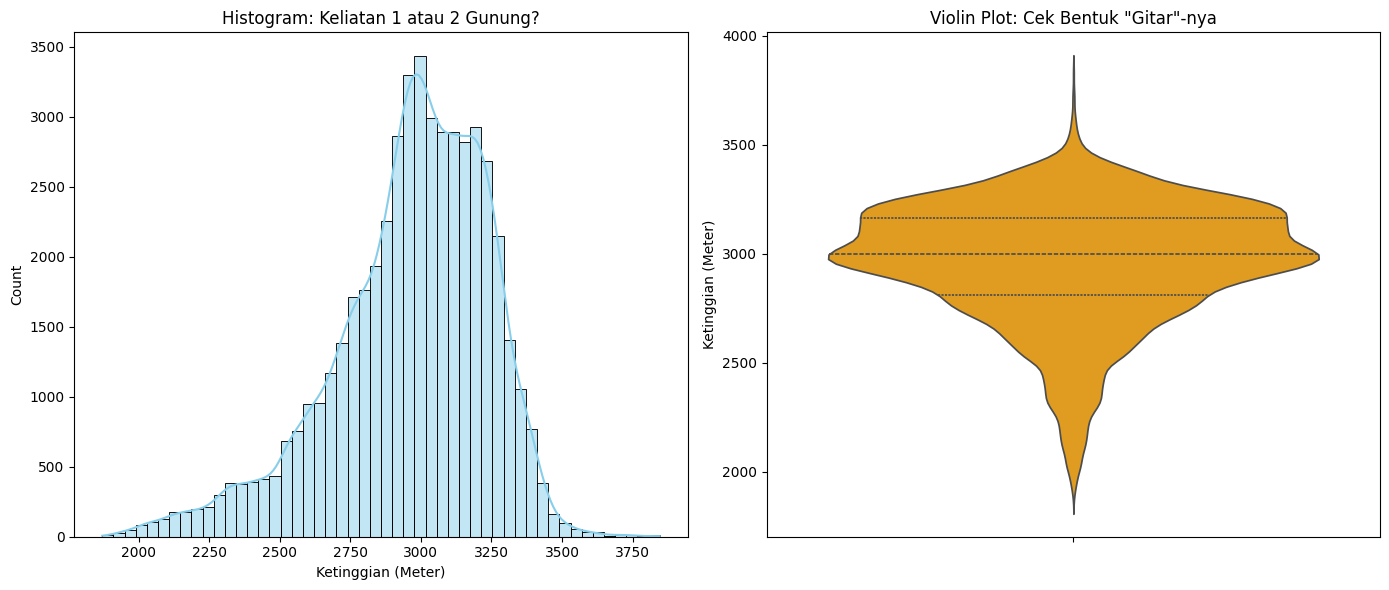

In [17]:
# Ambil sampel 50k biar cepet (laptop lo bakal ngos-ngosan kalau 500k)
df_sample = df.sample(50000, random_state=42)

# Set ukuran kanvas
plt.figure(figsize=(14, 6))

# --- PLOT 1: HISTOGRAM BIASA (Si Kotak) ---
plt.subplot(1, 2, 1)
# bins=50 biar detailnya keliatan
sns.histplot(data=df_sample, x='Elevation', bins=50, kde=True, color='skyblue')
plt.title('Histogram: Keliatan 1 atau 2 Gunung?', fontsize=12)
plt.xlabel('Ketinggian (Meter)')

# --- PLOT 2: VIOLIN PLOT (Si Hamil) ---
plt.subplot(1, 2, 2)
# inner='quartile' biar keliatan garis boxplot di dalemnya
sns.violinplot(data=df_sample, y='Elevation', color='orange', inner='quartile')
plt.title('Violin Plot: Cek Bentuk "Gitar"-nya', fontsize=12)
plt.ylabel('Ketinggian (Meter)')

plt.tight_layout()
plt.show()

## 📊 Deep Dive Analysis: Fenomena Distribusi Bimodal pada Elevasi

### 1. Observasi Visual
Berdasarkan visualisasi **Violin Plot** dan **Histogram** di atas, fitur `Elevation` (Ketinggian) menunjukkan pola distribusi yang unik, yaitu **Bimodal Distribution** (Distribusi Dua Puncak).

* **Puncak 1 (Zona Rendah/Lembah):** Terkonsentrasi di kisaran ketinggian **~2.000 - 2.500 mdpl**.
* **Puncak 2 (Zona Tinggi/Puncak):** Terkonsentrasi di kisaran ketinggian **~3.000 - 3.500 mdpl**.
* **Lembah Pemisah (Separation Valley):** Terdapat penurunan densitas data yang signifikan di antara kedua puncak tersebut (sekitar 2.750 mdpl).

---

### 2. Apa itu Bimodal Distribution?
Berbeda dengan distribusi normal (lonceng tunggal) yang memiliki satu nilai rata-rata dominan, distribusi bimodal memiliki **dua modus** (nilai yang sering muncul).

> **Analogi:** Bayangkan punggung unta berpunuk dua. Ini mengindikasikan bahwa data kita sebenarnya terdiri dari **dua populasi/kelompok yang berbeda** yang tercampur dalam satu dataset.

---

### 3. Business Insight & Domain Knowledge
Dalam konteks proyek **Precision Timber Scouting**, fenomena ini memberikan *insight* krusial:

1.  **Segmentasi Ekosistem Alami:** Hutan ini terbagi menjadi dua zona ekologis utama.
    * *Hipotesis:* Jenis pohon di **Zona Rendah** (seperti Ponderosa Pine/Cottonwood) kemungkinan besar berbeda total dengan jenis pohon di **Zona Tinggi** (seperti Spruce/Fir).
2.  **Elevasi sebagai "Golden Feature":** Variabel ketinggian adalah diskriminator (pembeda) terkuat. Model Machine Learning akan sangat bergantung pada fitur ini untuk memisahkan kelas target.

### 4. Rekomendasi Strategis (Actionable Item)
* **Feature Engineering:** Tidak perlu transformasi log/normalisasi paksa yang mengubah bentuk bimodal ini, karena bentuk ini justru membawa informasi penting.
* **Modeling:** Algoritma berbasis pohon (*Tree-Based Models*) seperti **Random Forest** atau **XGBoost** akan sangat efektif di sini karena mereka secara alami bisa membuat "percabangan" (*split*) di titik lembah (misal: `IF Elevation > 2750 THEN Group B`).

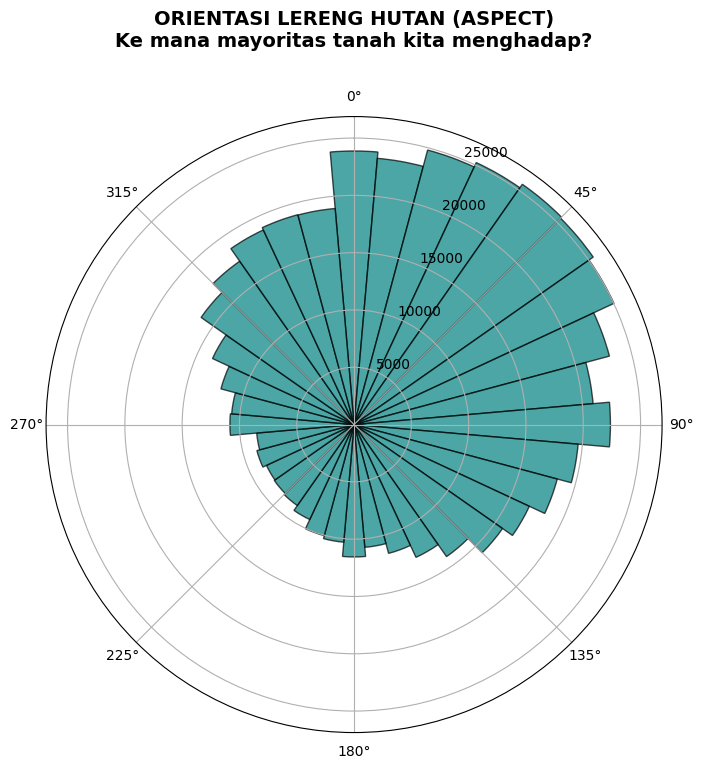

In [19]:
# --- 1. THE COMPASS PLOT (ASPECT) ---
# Kita bikin histogram tapi melingkar
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Ambil data Aspect
data_aspect = df['Aspect']

# Bikin Histogram (Bins)
counts, bins = np.histogram(data_aspect, bins=36) # Bagi jadi 36 arah (per 10 derajat)
# Hitung lebar bar
width = (2*np.pi) / 36

# Bikin Bar Chart Melingkar
# Konversi derajat ke radian karena polar plot butuh radian
theta = np.deg2rad(bins[:-1]) 
bars = ax.bar(theta, counts, width=width, bottom=0.0, color='teal', alpha=0.7, edgecolor='black')

# Hiasan Kompas
ax.set_theta_zero_location("N") # 0 derajat di Utara (Atas)
ax.set_theta_direction(-1)      # Putaran searah jarum jam
plt.title("ORIENTASI LERENG HUTAN (ASPECT)\nKe mana mayoritas tanah kita menghadap?", 
          fontsize=14, fontweight='bold', y=1.1)
plt.show()

## 🧭 INTERPRETASI: Polar Chart (Aspect)

### Cara Membaca Grafik:
Grafik ini memvisualisasikan **Orientasi Lereng** selayaknya sebuah kompas.
* **Pusat Lingkaran:** Asumsikan sebagai puncak gunung.
* **Arah Batang:** Menunjukkan ke arah mata angin mana tanah tersebut miring (Utara/Selatan/Timur/Barat).
* **Panjang Batang:** Menunjukkan frekuensi (seberapa banyak titik data yang menghadap ke arah tersebut).

### 🔍 Ecological Insight:
Arah lereng menentukan **Mikroklimat**:
1.  **Lereng Utara (0°/360°):** Cenderung lebih **lembab dan dingin** karena minim paparan matahari langsung (di belahan bumi utara). Cocok untuk vegetasi yang butuh banyak air.
2.  **Lereng Selatan (180°):** Cenderung lebih **kering dan panas** karena terpapar matahari sepanjang hari. Cocok untuk vegetasi tahan kekeringan.

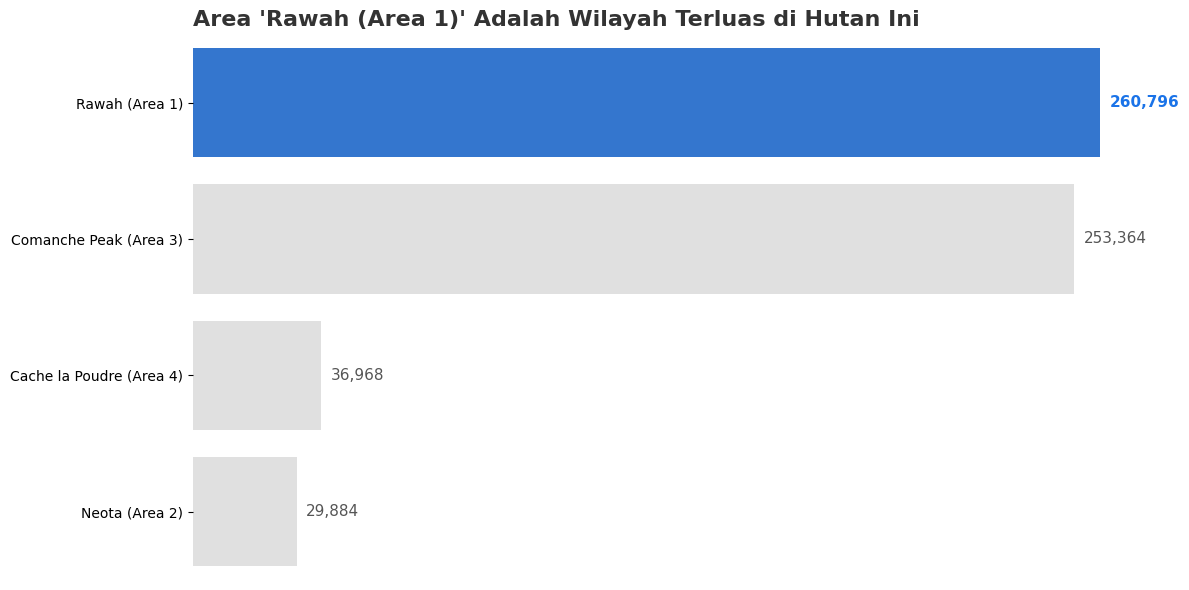

In [22]:
# --- 1. DATA PREP (Sama, tapi kita ringkas dulu datanya) ---
# Kita hitung dulu jumlahnya biar enak mainin warnanya
wild_counts = df['Wilderness_Name'].value_counts().reset_index()
wild_counts.columns = ['Wilderness_Name', 'Count']

# --- 2. LOGIKA WARNA STORYTELLING ---
# Default: Abu-abu (Pendukung)
bar_colors = ['#E0E0E0' for _ in range(len(wild_counts))]
# Juara 1: Biru (Highlight Utama)
bar_colors[0] = '#1A73E8' 

# --- 3. VISUALISASI ---
plt.figure(figsize=(12, 6))

# Pake Barplot (bukan Countplot) karena kita udah punya data ringkasannya
# hue & legend=False biar gak kena warning
ax = sns.barplot(
    x='Count', 
    y='Wilderness_Name', 
    data=wild_counts, 
    palette=bar_colors, 
    hue='Wilderness_Name', 
    legend=False
)

# --- 4. DE-CLUTTERING (Bersih-bersih) ---
sns.despine(left=True, bottom=True) # Hapus garis pinggir
plt.xlabel('')
plt.ylabel('')
plt.xticks([]) # Hapus angka sumbu X (Ganti pake label langsung)

# --- 5. DIRECT LABELING (Angka di ujung bar) ---
for i, v in enumerate(wild_counts['Count']):
    # Styling khusus: Juara 1 Tebal & Biru, Sisanya Biasa & Abu gelap
    font_weight = 'bold' if i == 0 else 'normal'
    text_color = '#1A73E8' if i == 0 else '#555555'
    
    # Taruh angka sedikit di sebelah kanan bar
    ax.text(v + (wild_counts['Count'].max() * 0.01), i, 
            f'{v:,}', 
            va='center', fontsize=11, fontweight=font_weight, color=text_color)

# --- 6. JUDUL "STORYTELLING" ---
# Judul harus ngasih tau INSIGHT, bukan cuma nama grafik
top_area = wild_counts.iloc[0]['Wilderness_Name']
plt.title(f"Area '{top_area}' Adalah Wilayah Terluas di Hutan Ini", 
          fontsize=16, fontweight='bold', color='#333333', loc='left')

plt.tight_layout()
plt.show()

## 🗺️ TERRITORY MAPPING: Dominasi Wilayah Hutan

### 🎯 Objective (Tujuan)
Memetakan distribusi geografis dari titik data. Kita ingin menjawab: "Di mana lokasi mayoritas hutan kita berada?" Apakah tersebar merata atau terpusat di satu cagar alam saja?

### 🎨 Visual Decoding (Cara Baca)
* **Highlight Biru (#1A73E8):** Menandakan **Wilayah Paling Dominan**. Ini adalah "Ibukota" dari dataset kita. Sebagian besar operasi atau observasi hutan terjadi di sini.
* **Warna Abu-abu (#E0E0E0):** Wilayah pendukung.
* **Direct Labeling:** Angka jumlah diletakkan langsung di ujung batang. Ini memudahkan mata membaca nilai eksak tanpa harus menarik garis imajiner ke sumbu bawah.

> **💡 Senior Insight:**
> Jangan remehkan batang yang pendek (Abu-abu)!
> Meskipun wilayah seperti **Cache la Poudre** (Area 4) jumlah datanya sedikit, ingat hasil analisis sebelumnya: Wilayah ini adalah satu-satunya rumah bagi spesies **Cottonwood**. Batang pendek bukan berarti tidak penting, bisa jadi itu adalah "Niche Market" kita.

### C.2 Bivariate Analysis

In [27]:
tree_names = {
    1: "Spruce/Fir",
    2: "Lodgepole Pine",
    3: "Ponderosa Pine",
    4: "Cottonwood/Willow",
    5: "Aspen",
    6: "Douglas-fir",
    7: "Krummholz"
}
df['Tree_Name'] = df['Cover_Type'].map(tree_names)

# Mapping Nama Wilayah (Biar gak cuma angka 0/1)
wild_cols = [col for col in df.columns if 'Wilderness_Area' in col]
wild_names = {
    'Wilderness_Area1': 'Rawah (Area 1)',
    'Wilderness_Area2': 'Neota (Area 2)',
    'Wilderness_Area3': 'Comanche Peak (Area 3)',
    'Wilderness_Area4': 'Cache la Poudre (Area 4)'
}
df['Wilderness_Name'] = df[wild_cols].idxmax(axis=1).map(wild_names)

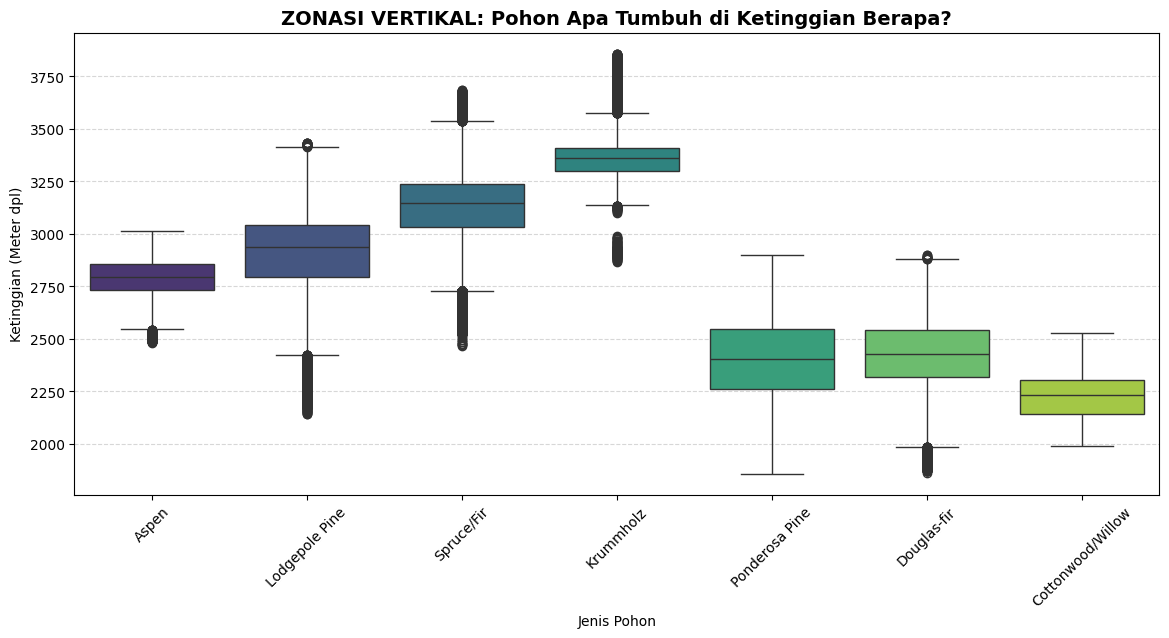

In [26]:
# ---------------------------------------------------------
# 2. PLOT A: ZONASI VERTIKAL (ELEVATION VS TREE) - REVISI
# ---------------------------------------------------------
plt.figure(figsize=(14, 6))

# PERBAIKAN DI SINI:
# Tambah hue='Tree_Name' dan legend=False
sns.boxplot(
    x='Tree_Name', 
    y='Elevation', 
    data=df, 
    palette='viridis',
    hue='Tree_Name',  # <--- Kasih tau warnanya ikutin nama pohon
    legend=False      # <--- Matiin legend biar gak menuh-menuhin
)

plt.title('ZONASI VERTIKAL: Pohon Apa Tumbuh di Ketinggian Berapa?', fontsize=14, fontweight='bold')
plt.xlabel('Jenis Pohon')
plt.ylabel('Ketinggian (Meter dpl)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## 🏔️ VERTICAL ZONATION: Hukum Rimba Ketinggian

### 🎯 Objective (Tujuan)
Memvalidasi hipotesis ekologis bahwa "Setiap pohon memiliki zona nyamannya masing-masing". Kita menggunakan **Boxplot** untuk melihat rentang ketinggian (Elevasi) tempat masing-masing spesies tumbuh.

### 🎨 Visual Decoding (Cara Baca Boxplot)
* **Garis Tengah di dalam Kotak:** Itu adalah **Median** (Nilai Tengah). Ini menunjukkan ketinggian "favorit" pohon tersebut.
* **Kotak (Box):** Menunjukkan di mana **50% populasi utama** pohon itu berada (Interquartile Range).
* **Posisi Kotak (Atas vs Bawah):**
    * Kotak yang posisinya **Rendah** (di sumbu Y) = Pohon Lembah.
    * Kotak yang posisinya **Tinggi** = Pohon Puncak Gunung.

> **💡 Senior Insight:**
> Perhatikan betapa terpisahnya kotak **Cottonwood** (paling bawah) dengan **Krummholz** (paling atas). Mereka hidup di dunia yang berbeda dan hampir tidak pernah bertemu. Ini adalah fitur pemisah (discriminator) yang sangat kuat untuk model nanti.

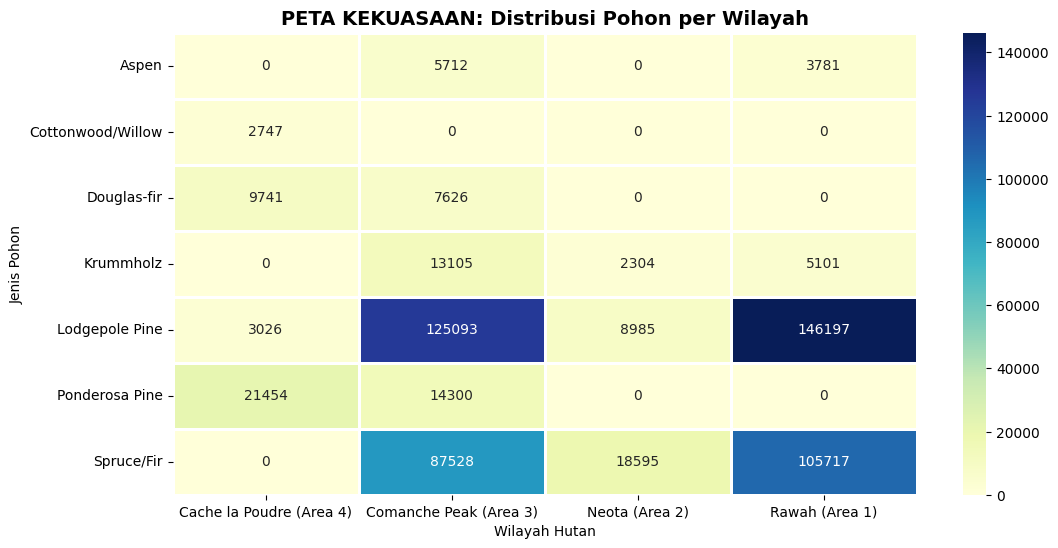

In [28]:
# ---------------------------------------------------------
# 3. PLOT B: PETA KEKUASAAN (WILDERNESS VS TREE)
# ---------------------------------------------------------
plt.figure(figsize=(12, 6))
# Bikin Tabel Silang dulu
ct = pd.crosstab(df['Tree_Name'], df['Wilderness_Name'])
# Plot Heatmap
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu', linewidths=1)
plt.title('PETA KEKUASAAN: Distribusi Pohon per Wilayah', fontsize=14, fontweight='bold')
plt.ylabel('Jenis Pohon')
plt.xlabel('Wilayah Hutan')
plt.show()

## 🗺️ SPATIAL DISTRIBUTION: Peta Kekuasaan Wilayah

### 🎯 Objective (Tujuan)
Memetakan preferensi geografis setiap spesies pohon. Heatmap ini menjawab pertanyaan: "Apakah pohon tertentu hanya mau tumbuh di wilayah tertentu (Endemik)?" atau "Apakah ada pohon yang bisa hidup di mana saja (Generalis)?"

### 🎨 Visual Decoding (Cara Baca Heatmap)
* **Sumbu X (Bawah):** 4 Wilayah Hutan (Wilderness Areas).
* **Sumbu Y (Kiri):** Jenis Pohon.
* **Warna & Angka:**
    * **Gelap/Angka Besar:** Menunjukkan dominasi mutlak. Wilayah tersebut adalah "Markas Besar" pohon itu.
    * **Terang/Angka 0:** Menunjukkan ketidakhadiran (Absence). Pohon itu **sama sekali tidak ada** di wilayah tersebut.
    * **Angka 0 = Insight Mahal:** Dalam Machine Learning, nilai 0 ini sangat berharga karena menjadi aturan *Hard Rule* (misal: "Jika Wilayah = Rawah, Probabilitas Cottonwood = 0%").

### C.3 Multivariate Analysis

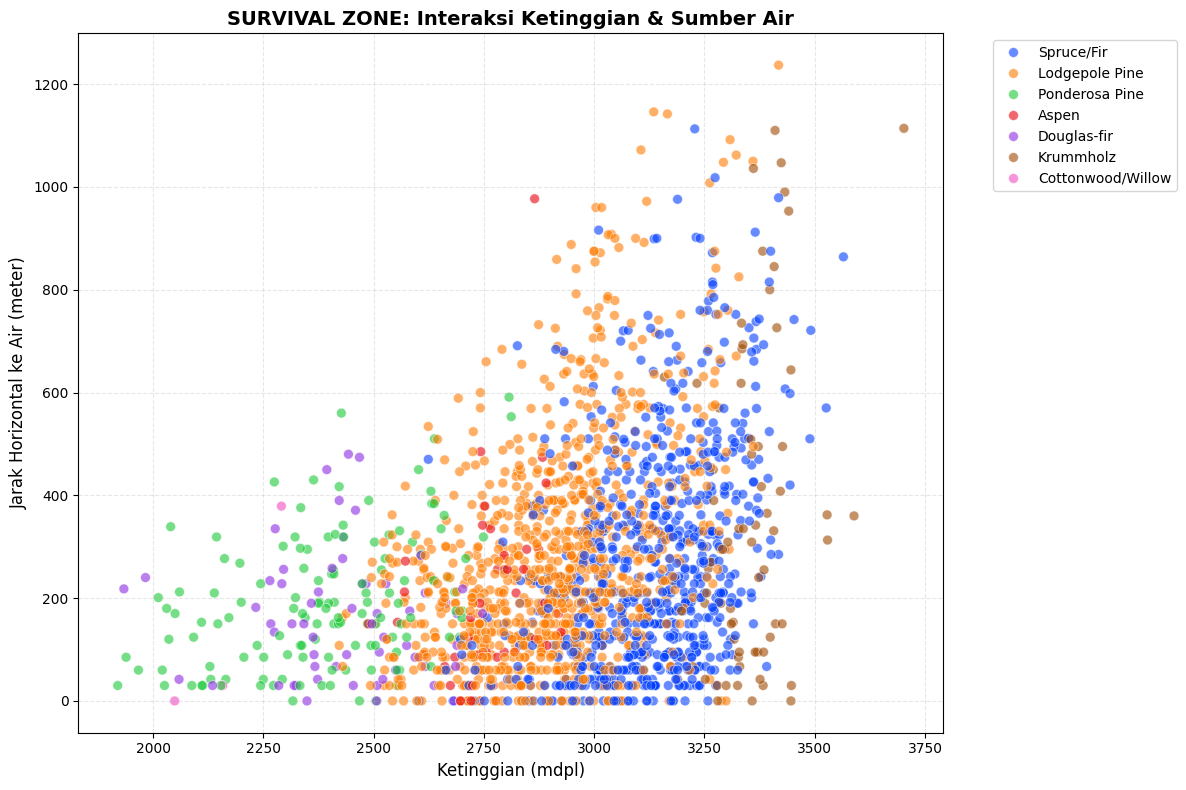

In [29]:
# Ambil sample biar plot enak dibaca & ringan
df_sample = df.sample(2000, random_state=42)

plt.figure(figsize=(12, 8))

# Scatterplot: X=Elevation, Y=Jarak ke Air, Warna=Jenis Pohon
sns.scatterplot(
    data=df_sample,
    x='Elevation',
    y='Horizontal_Distance_To_Hydrology',
    hue='Tree_Name', # Dimensi ke-3 (Warna)
    palette='bright',
    alpha=0.6,       # Transparansi biar kalau numpuk keliatan
    s=50             # Ukuran titik
)

plt.title('SURVIVAL ZONE: Interaksi Ketinggian & Sumber Air', fontsize=14, fontweight='bold')
plt.xlabel('Ketinggian (mdpl)', fontsize=12)
plt.ylabel('Jarak Horizontal ke Air (meter)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Legenda di luar biar rapi
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## 💧 SURVIVAL ZONE: Interaksi Ketinggian & Sumber Air

### 🎯 Objective (Tujuan)
Memvalidasi hipotesis: "Apakah pohon tertentu hanya bisa hidup jika dekat dengan air?" (Hydrology Dependency). Kita melihat interaksi antara **Elevasi** (X) dan **Jarak ke Air** (Y).

### 🎨 Visual Decoding (Cara Baca Scatterplot)
* **Sumbu X (Kiri-Kanan):** Ketinggian (Elevasi). Makin ke kanan = Makin Puncak Gunung.
* **Sumbu Y (Bawah-Atas):** Jarak ke Air. Makin ke atas = Makin Kering/Jauh dari sungai.
* **Titik Warna:** Merepresentasikan individu pohon.
    * **Cluster di Pojok Kiri Bawah:** Artinya pohon itu butuh **Dataran Rendah & Basah**.
    * **Sebaran Vertikal Tinggi:** Artinya pohon itu **Toleran Kekeringan** (bisa hidup dekat sungai, bisa juga jauh banget).

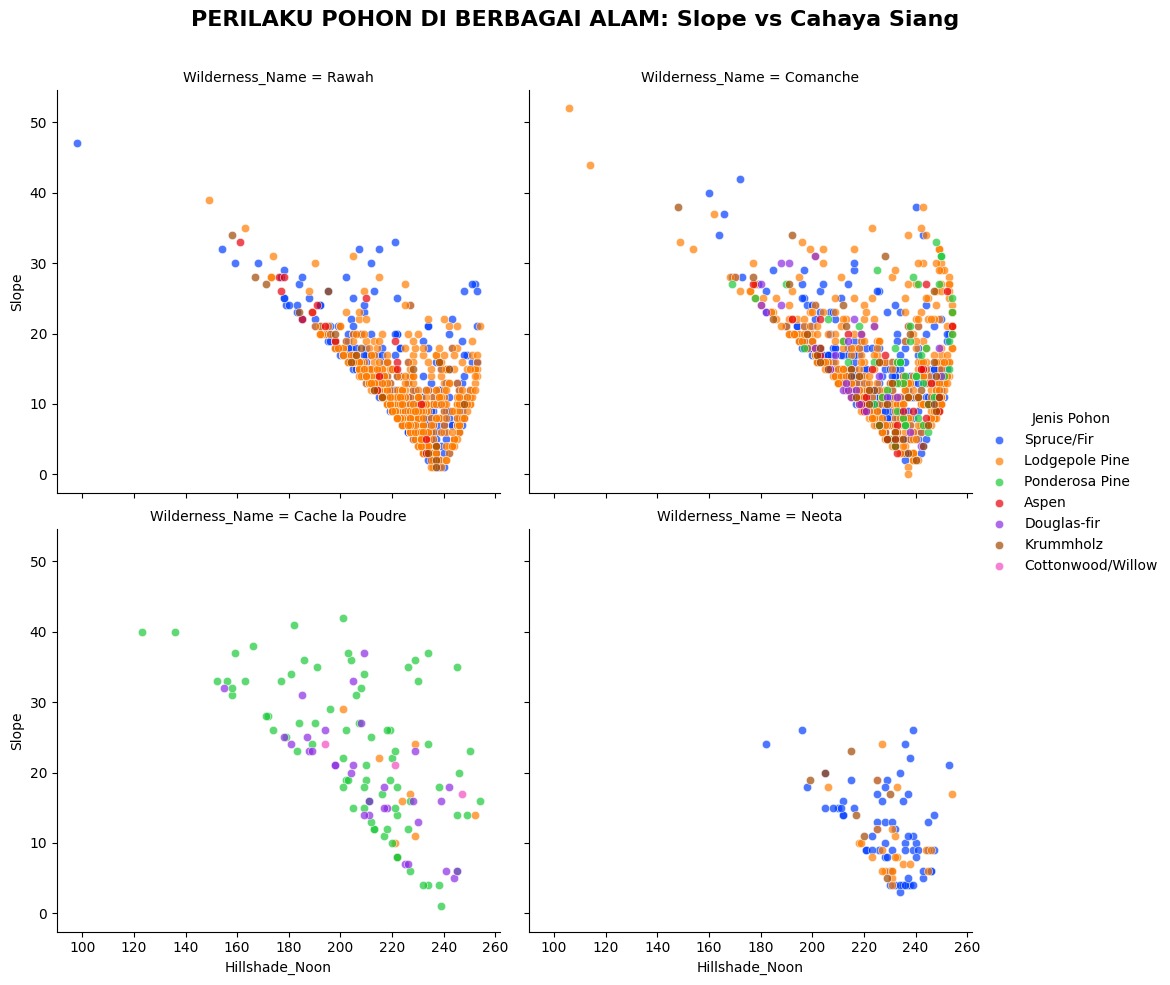

In [ ]:
# 1. Ambil Sample (Wajib biar gak berat render 4 plot sekaligus)
df_sample = df.sample(2000, random_state=42)

# 2. Pastikan kolom nama pohon & wilayah ada (Mapping ulang biar aman)
tree_names = {1:"Spruce/Fir", 2:"Lodgepole Pine", 3:"Ponderosa Pine", 
              4:"Cottonwood/Willow", 5:"Aspen", 6:"Douglas-fir", 7:"Krummholz"}
df_sample['Tree_Name'] = df_sample['Cover_Type'].map(tree_names)

wild_cols = [c for c in df.columns if 'Wilderness_Area' in c]
wild_names = {'Wilderness_Area1':'Rawah', 'Wilderness_Area2':'Neota', 
              'Wilderness_Area3':'Comanche', 'Wilderness_Area4':'Cache la Poudre'}
df_sample['Wilderness_Name'] = df_sample[wild_cols].idxmax(axis=1).map(wild_names)

# 3. THE FACET GRID (Jurus Utama)
# col='Wilderness_Name' -> Bikin 4 kolom grafik terpisah buat tiap wilayah
# hue='Tree_Name' -> Warnain berdasarkan pohon
g = sns.FacetGrid(df_sample, col="Wilderness_Name", hue="Tree_Name", 
                  col_wrap=2, height=5, palette="bright")

# Isi grid dengan Scatterplot
g.map(sns.scatterplot, "Hillshade_Noon", "Slope", alpha=0.7)

# Rapikan
g.add_legend(title="Jenis Pohon")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('PERILAKU POHON DI BERBAGAI ALAM: Slope vs Cahaya Siang', fontsize=16, fontweight='bold')
plt.show()

Cara Analisis:

Bandingkan Area Rawah sama Cache la Poudre.

Apakah di Cache la Poudre (Pojok Kanan Bawah), titik-titiknya lebih nyebar atau ngumpul di Slope rendah? (Biasanya Area 4 ini datar/lembah).

Liat Ponderosa Pine (Tipe 3): Di wilayah mana dia paling dominan menguasai grafik?

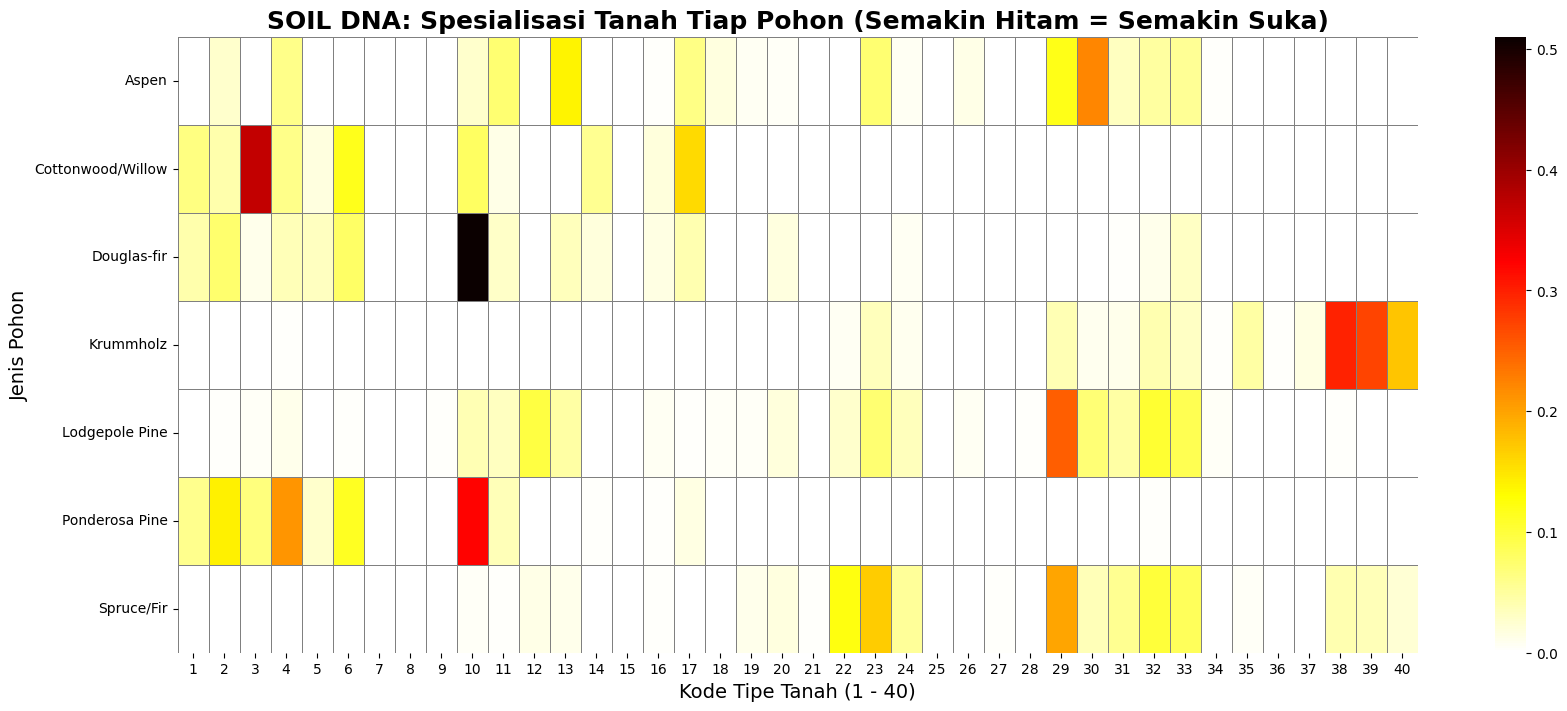

In [31]:
# 1. Reverse One-Hot Encoding untuk SEMUA 40 Tanah
# Kita butuh data aslinya (bukan sample) buat hitungan akurat
soil_cols = [f'Soil_Type{i}' for i in range(1, 41)]
df['Soil_ID'] = df[soil_cols].idxmax(axis=1).str.replace('Soil_Type', '').astype(int)

# 2. Bikin Tabel Kontingensi (Crosstab)
# Baris: Jenis Pohon
# Kolom: Nomor Tanah (1-40)
soil_matrix = pd.crosstab(df['Tree_Name'], df['Soil_ID'])

# 3. Normalisasi per Baris (PENTING!)
# Kita mau liat persentase preferensi.
# Misal: 80% Spruce ada di Tanah X.
# Kalau gak dinormalisasi, Lodgepole Pine bakal menang di semua tanah cuma karena jumlahnya banyak.
soil_matrix_pct = soil_matrix.div(soil_matrix.sum(axis=1), axis=0)

# 4. Plot Heatmap Raksasa
plt.figure(figsize=(20, 8)) # Lebar banget biar muat 40 kolom
sns.heatmap(soil_matrix_pct, cmap='hot_r', linewidths=0.5, linecolor='gray')

plt.title('SOIL DNA: Spesialisasi Tanah Tiap Pohon (Semakin Hitam = Semakin Suka)', fontsize=18, fontweight='bold')
plt.xlabel('Kode Tipe Tanah (1 - 40)', fontsize=14)
plt.ylabel('Jenis Pohon', fontsize=14)
plt.show()

Cara Analisis (Insight Mahal):

Cari Kotak Hitam/Gelap:

Liat baris Cottonwood/Willow. Cek di Tanah Nomor berapa dia item banget? (Biasanya Tanah 1-6). Artinya dia Spesialis, cuma mau hidup di tanah itu.

Liat Pola Penyebaran:

Bandingkan sama Lodgepole Pine. Apakah warnanya nyebar tipis-tipis di banyak nomor tanah? (Artinya dia Generalis, bisa hidup di mana aja).

Soil 29 & 30:

Cek Tanah No 29 & 30. Siapa yang paling dominan di situ? (Biasanya ini tanah favorit mayoritas).

## D. Data Preprocessing

In [32]:
def manual_stratified_split(df, target_col, test_ratio=0.2, seed=42):
    """
    Membelah data Training & Testing dengan menjaga proporsi kelas target.
    Murni menggunakan NumPy & Pandas (Tanpa Scikit-Learn).
    """
    np.random.seed(seed) # Kunci biar hasil kocokan konsisten
    
    train_indices = []
    test_indices = []
    
    # Ambil daftar unik kelas target (Jenis Pohon 1-7)
    classes = df[target_col].unique()
    
    print(f"⚙️ Memulai Stratifikasi untuk {len(classes)} Kelas...")
    
    # LOOPING PER KELAS (Ini inti logikanya!)
    for c in classes:
        # A. Ambil semua index (nomor baris) milik kelas c
        indices = df[df[target_col] == c].index.to_numpy()
        
        # B. Kocok index-nya (Shuffle) biar acak
        np.random.shuffle(indices)
        
        # C. Hitung titik potong (Cut Point)
        # Misal: Ada 100 data Cottonwood, test_ratio 0.2 -> Potong di data ke-20
        split_point = int(len(indices) * test_ratio)
        
        # D. Masukin ke keranjang masing-masing
        # 0 sampai split_point masuk ke TEST (20%)
        test_indices.extend(indices[:split_point])
        # Sisanya masuk ke TRAIN (80%)
        train_indices.extend(indices[split_point:])
        
    # E. Ambil data asli berdasarkan index yang udah dipilih
    train_set = df.loc[train_indices]
    test_set = df.loc[test_indices]
    
    # F. Kocok ulang hasil akhirnya (PENTING!)
    # Biar urutan datanya gak "1,1,1... 2,2,2..." tapi "1,7,3,2,1..."
    train_set = train_set.sample(frac=1, random_state=seed).reset_index(drop=True)
    test_set = test_set.sample(frac=1, random_state=seed).reset_index(drop=True)
    
    return train_set, test_set

In [33]:
# ==========================================
# 2. EKSEKUSI & DEFINISI X, y
# ==========================================

# A. Pastikan Data Bersih dari Kolom Visualisasi
cols_to_drop = ['Tree_Name', 'Wilderness_Name', 'Soil_ID']
# Kita buang kolom helper, tapi 'Cover_Type' JANGAN DIBUANG dulu (karena dipake buat split)
df_clean = df.drop([c for c in cols_to_drop if c in df.columns], axis=1)

# B. Jalankan Fungsi Manual
print("🚀 Sedang membelah hutan (Splitting)...")
train_df, test_df = manual_stratified_split(df_clean, target_col='Cover_Type', test_ratio=0.2)

# C. BARU KITA DEFINISIKAN X DAN y
# Pisahkan Fitur dan Target untuk Training
X_train = train_df.drop('Cover_Type', axis=1)
y_train = train_df['Cover_Type']

# Pisahkan Fitur dan Target untuk Testing
X_test = test_df.drop('Cover_Type', axis=1)
y_test = test_df['Cover_Type']

print("-" * 30)
print(f"✅ SELESAI! (Pure Python Logic)")
print(f"📦 X_train shape: {X_train.shape} (Fitur Latih)")
print(f"📦 y_train shape: {y_train.shape} (Kunci Jawaban Latih)")
print(f"📦 X_test shape : {X_test.shape} (Fitur Ujian)")
print(f"📦 y_test shape : {y_test.shape} (Kunci Jawaban Ujian)")
print("-" * 30)

🚀 Sedang membelah hutan (Splitting)...
⚙️ Memulai Stratifikasi untuk 7 Kelas...
------------------------------
✅ SELESAI! (Pure Python Logic)
📦 X_train shape: (464812, 55) (Fitur Latih)
📦 y_train shape: (464812,) (Kunci Jawaban Latih)
📦 X_test shape : (116200, 55) (Fitur Ujian)
📦 y_test shape : (116200,) (Kunci Jawaban Ujian)
------------------------------


# ⚖️ SCALING CHEAT SHEET: To Scale or Not To Scale?

Panduan cepat untuk menentukan apakah algoritma Machine Learning memerlukan fitur yang sudah di-standarisasi (Scaling) atau tidak.

---

## 🚨 TEAM SENSITIVE (Wajib Scaling!)
Algoritma di bawah ini **AKAN HANCUR** atau **LAMBAT PARAH** jika data tidak di-scale (misal: mencampur satuan Meter dengan Kilometer).

| Algoritma | Kenapa Wajib Scaling? 💡 |
| :--- | :--- |
| **1. K-Nearest Neighbor (KNN)** | **Distance-Based.** KNN menghitung "siapa tetangga terdekat" menggunakan jarak (Euclidean). Fitur dengan angka ribuan (Gaji) akan mendominasi fitur satuan (Umur). |
| **2. K-Means Clustering** | **Distance-Based.** Sama seperti KNN, K-Means mengelompokkan data berdasarkan jarak ke titik pusat (Centroid). Tanpa scaling, cluster akan berbentuk lonjong aneh. |
| **3. Support Vector Machine (SVM)** | **Distance & Margin.** SVM mencari "jalan tol" (hyperplane) terlebar. Fitur dengan skala besar akan mendominasi perhitungan jarak vektor, membuat batas pemisah menjadi bias. |
| **4. Linear Regression** (Simple/Multiple) | **Gradient Descent.** Jika menggunakan metode optimasi Gradient Descent, skala yang beda jauh membuat "jalan menuruni bukit error" jadi berliku-liku (Zig-Zag), sehingga training sangat lama. <br>*(Note: Scaling juga wajib jika pakai Regularization seperti Lasso/Ridge).* |
| **5. Logistic Regression** | **Gradient Descent.** Sama seperti Linear Regression, algoritma ini mencari koefisien optimal dengan menuruni gradien. Scaling mempercepat konvergensi (cepat ketemu solusi). |
| **6. Polynomial Regression** | **Extreme Variance.** Bayangkan $X = 1000$. Maka $X^2 = 1.000.000$. Pangkat membuat ledakan skala semakin parah. Wajib scale biar komputer gak *overflow* atau bias. |
| **7. Multivariate Regression** | **Gradient Descent.** Sama alasannya dengan Linear Regression biasa. |

> **⚠️ Senior Note:**
> Khusus untuk Neural Network (Deep Learning), hukumnya **WAJIB FARDHU 'AIN** pake Scaling.

---

## 🛡️ TEAM ROBUST (Kebal/Gak Butuh Scaling)
Algoritma ini "Masa Bodo" dengan angka. Mau lo kasih angka 1 atau 1 Juta, cara pikir mereka tetap sama.

| Algoritma | Kenapa Aman Tanpa Scaling? 🛡️ |
| :--- | :--- |
| **1. Decision Tree** | **Rule-Based.** Pohon cuma nanya: *"Apakah Tinggi > 10 meter?"*. Kalau angkanya diubah jadi cm (1000 cm), pertanyaannya cuma ganti jadi *"Apakah Tinggi > 1000 cm?"*. Struktur pohon dan hasil prediksinya 100% sama. |
| **2. Random Forest** | **Ensemble of Trees.** Karena isinya kumpulan Decision Tree, maka sifatnya mewarisi kekebalan Tree terhadap skala. |
| **3. Naive Bayes** | **Probability-Based.** Algoritma ini menghitung *peluang* kemunculan data. Peluang itu tidak terpengaruh oleh jarak atau besaran angka, melainkan frekuensi. |

---

### 🏆 Kesimpulan Strategis
* Jika ragu, **LAKUKAN SCALING**.
* Scaling hampir tidak pernah merusak performa *Team Robust* (paling cuma nambah waktu dikit), tapi **Lupa Scaling** akan membunuh performa *Team Sensitive*.
* Pengecualian: Jika ingin mempertahankan *interpretability* asli (misal: ingin tau kenaikan gaji dalam Rupiah, bukan dalam Z-Score) pada Linear Regression, dan datanya tidak terlalu jomplang.

In [34]:
# ==========================================
# HITUNG BOBOT HUKUMAN (CLASS WEIGHTS)
# ==========================================

# 1. Ambil data jumlah per kelas dari y_train (Hanya dari data latih!)
# Ingat: Jangan hitung dari Test set (haram).
class_counts = y_train.value_counts().sort_index()

# 2. Rumus Manual
n_samples = len(y_train)
n_classes = len(class_counts)

# Rumus: Total Sample / (Jumlah Kelas * Jumlah Sample per Kelas itu)
class_weights_manual = n_samples / (n_classes * class_counts)

# 3. Masukin ke Dictionary biar rapi
# Format: {1: 0.5, 2: 0.4, ... 4: 50.0}
weight_dict = class_weights_manual.to_dict()

print("⚖️ SKEMA HUKUMAN (CLASS WEIGHTS):")
print("Logika: Kalau angka > 1, berarti Prioritas Tinggi (Langka).")
print("-" * 40)
for kelas, bobot in weight_dict.items():
    # Ambil nama pohon dari dictionary lama biar enak dibaca
    nama_pohon = {1:"Spruce/Fir", 2:"Lodgepole Pine", 3:"Ponderosa Pine", 
                  4:"Cottonwood/Willow", 5:"Aspen", 6:"Douglas-fir", 7:"Krummholz"}
    
    print(f"Kelas {kelas} ({nama_pohon.get(kelas, 'Unknown')}): \tBobot = {bobot:.4f}")

print("-" * 40)
print(f"Total Data Train: {n_samples:,}")

⚖️ SKEMA HUKUMAN (CLASS WEIGHTS):
Logika: Kalau angka > 1, berarti Prioritas Tinggi (Langka).
----------------------------------------
Kelas 1 (Spruce/Fir): 	Bobot = 0.3918
Kelas 2 (Lodgepole Pine): 	Bobot = 0.2930
Kelas 3 (Ponderosa Pine): 	Bobot = 2.3214
Kelas 4 (Cottonwood/Willow): 	Bobot = 30.2101
Kelas 5 (Aspen): 	Bobot = 8.7428
Kelas 6 (Douglas-fir): 	Bobot = 4.7792
Kelas 7 (Krummholz): 	Bobot = 4.0469
----------------------------------------
Total Data Train: 464,812


# ⚖️ HANDLING IMBALANCED DATA: The Strategic Guide

Panduan memilih strategi untuk menangani ketimpangan data (Contoh: Kelas A = 100.000 data, Kelas B = 100 data).

---

## 1. Undersampling (Membuang Data Mayoritas) 📉
**Konsep:** Memotong data kelas Mayoritas agar jumlahnya sama sedikitnya dengan kelas Minoritas.
* **Analogi:** "Diet Ekstrim". Tubuh gemuk dipaksa kurus mendadak.

| Kapan Digunakan? | Alasannya | Risiko/Bahaya ⚠️ |
| :--- | :--- | :--- |
| **Data Super Raksasa** (Jutaan Baris). | Training model terlalu lama/berat jika pakai semua data. Kita butuh efisiensi. | **Kehilangan Informasi.** Variasi penting pada kelas mayoritas ikut terbuang. Model jadi "kurang wawasan". |
| **Target Mayoritas Redundan.** | Jika 1 juta data isinya mirip-mirip semua, aman untuk dibuang sebagian. | |

---

## 2. Oversampling / SMOTE (Menambah Data Minoritas) 📈
**Konsep:** Membuat data sintetis (palsu) untuk kelas Minoritas agar jumlahnya sama banyaknya dengan kelas Mayoritas.
* **Analogi:** "Kloning". Kita meng-copy atau membuat kembaran dari data yang sedikit.

| Kapan Digunakan? | Alasannya | Risiko/Bahaya ⚠️ |
| :--- | :--- | :--- |
| **Data Kecil/Sedikit.** | Kita kekurangan bahan bakar untuk belajar. Sayang kalau data dibuang (Undersampling). | **Overfitting.** Model menghafal data palsu. |
| **Akurasi Model Masih Jelek.** | Class Weight sudah dicoba tapi model masih gagal mendeteksi kelas minoritas. | **Komputasi Berat.** Data meledak (bisa 2x - 10x lipat). RAM bisa jebol & training lambat. |
| | | **Noise.** Data buatan SMOTE kadang tidak masuk akal (Halusinasi). |

---

## 3. Class Weights (Memberi Hukuman Bobot) ⚖️ 🏆 *Senior's Choice*
**Konsep:** Tidak mengubah jumlah data. Hanya mengubah "Aturan Penilaian". Jika model salah menebak kelas Minoritas, hukumannya (Loss/Error) dilipatgandakan.
* **Analogi:** "Denda Prioritas". Salah tebak orang biasa didenda Rp 10rb. Salah tebak Pejabat didenda Rp 1 Miliar.

| Kapan Digunakan? | Alasannya | Risiko/Bahaya ⚠️ |
| :--- | :--- | :--- |
| **Data Besar & Kompleks.** | Paling efisien. Tidak menambah beban RAM (seperti SMOTE) dan tidak membuang info (seperti Undersampling). | **Kadang Kurang Agresif.** Pada kasus ekstrim (misal 1:10.000), kadang model tetap bandel meski sudah dikasih bobot. |
| **Model Tree-Based.** | Random Forest & XGBoost sangat responsif terhadap bobot ini. | |
| **Resource Terbatas.** | Laptop spek kentang tapi data ratusan ribu baris. | |

---

### 🧠 Keputusan Kita untuk Dataset Hutan (Forest Covertype)
Kita memilih **Strategi No. 3 (Class Weights)** karena:
1.  **Total Data Besar (580k):** Jika di-SMOTE, bisa meledak jadi 1.5 Juta baris (RAM Engap).
2.  **Informasi Berharga:** Jika di-Undersampling, kita membuang 95% data Pinus (Sayang banget).
3.  **Random Forest:** Algoritma ini sangat patuh pada *Class Weights*.

> **💡 Senior Note:**
> Selalu mulai dengan **Class Weights** dulu. Itu cara paling elegan & murah. Jika hasilnya masih jelek, baru pertimbangkan **SMOTE**. Undersampling adalah jalan terakhir.

In [35]:
class CompactRandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples=2, n_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.n_features = n_features
        self.trees = []

    def fit(self, X, y, weights=None):
        self.trees = []
        n_samples, self.n_features = X.shape[0], (self.n_features or int(np.sqrt(X.shape[1])))
        
        for _ in range(self.n_trees):
            # 1. Bootstrapping (Weighted)
            p = weights / np.sum(weights) if weights is not None else None
            idxs = np.random.choice(n_samples, n_samples, replace=True, p=p)
            
            # 2. Tanam Pohon (Langsung simpen root node-nya aja)
            self.trees.append(self._build_tree(X[idxs], y[idxs], 0))
            print(".", end="") # Progress bar hemat
            
    def _build_tree(self, X, y, depth):
        n_labels = len(np.unique(y))
        # Stopping Criteria (Langsung return Leaf Value)
        if depth >= self.max_depth or n_labels == 1 or len(y) < self.min_samples:
            return np.bincount(y).argmax() if len(y) > 0 else 0

        # Cari Split Terbaik
        feat_idxs = np.random.choice(X.shape[1], self.n_features, replace=False)
        best_feat, best_thr = self._find_best_split(X, y, feat_idxs)
        
        if best_feat is None: return np.bincount(y).argmax()

        # Rekursif (Bikin Cabang)
        left_idx = X[:, best_feat] <= best_thr
        left = self._build_tree(X[left_idx], y[left_idx], depth + 1)
        right = self._build_tree(X[~left_idx], y[~left_idx], depth + 1)
        
        return (best_feat, best_thr, left, right) # Node disimpen sebagai Tuple hemat memori

    def _find_best_split(self, X, y, feat_idxs):
        best_gain, best_split = -1, (None, None)
        parent_entropy = self._entropy(y)
        
        for feat in feat_idxs:
            # Optimasi: Ambil unique values maks 10 aja biar cepet
            thresholds = np.unique(X[:, feat])
            if len(thresholds) > 10: thresholds = np.random.choice(thresholds, 10, replace=False)
            
            for thr in thresholds:
                left_mask = X[:, feat] <= thr
                if np.sum(left_mask) == 0 or np.sum(~left_mask) == 0: continue
                
                # Hitung Gain
                n = len(y)
                e_l, e_r = self._entropy(y[left_mask]), self._entropy(y[~left_mask])
                child_entropy = (np.sum(left_mask)/n) * e_l + (np.sum(~left_mask)/n) * e_r
                
                if (gain := parent_entropy - child_entropy) > best_gain:
                    best_gain, best_split = gain, (feat, thr)
        return best_split

    def _entropy(self, y):
        ps = np.bincount(y) / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def predict(self, X):
        # Traverse Tree buat tiap data
        tree_preds = np.array([np.array([self._predict_one(x, tree) for x in X]) for tree in self.trees])
        # Voting Mayoritas (Axis 0 = Trees)
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=tree_preds)

    def _predict_one(self, x, node):
        if isinstance(node, (int, np.integer)): return node # Kalau node cuma angka, berarti daun
        feat, thr, left, right = node
        return self._predict_one(x, left) if x[feat] <= thr else self._predict_one(x, right)

In [37]:
# A. Pastikan kita punya weight_dict (Hitung ulang biar aman)
# Biar kalau lo restart kernel, kode ini tetep jalan
print("⚖️ Menghitung ulang bobot dosa...")
vals, counts = np.unique(y_train, return_counts=True)
n_samples = len(y_train)
n_classes = len(vals)
weight_dict = {k: n_samples / (n_classes * v) for k, v in zip(vals, counts)}

# B. Ambil SAMPLE KECIL (Biar training cepet)
sample_size = 2000 
print(f"✂️ Mengambil {sample_size} sampel data...")

# Acak index
idxs = np.random.choice(len(X_train), sample_size, replace=False)

# C. KONVERSI KE NUMPY (PENTING!!!)
# CompactRandomForest gak bisa baca Pandas, harus Numpy Array (.values)
X_train_sample = X_train.iloc[idxs].values
y_train_sample = y_train.iloc[idxs].values

# D. Mapping Bobot ke Sample
sample_weights = np.array([weight_dict[y] for y in y_train_sample])

# ==========================================
# 2. EKSEKUSI TRAINING
# ==========================================
print("\n🚀 Training Compact RF (Speedrun Mode)...")
rf_compact = CompactRandomForest(n_trees=5, max_depth=5)
rf_compact.fit(X_train_sample, y_train_sample, weights=sample_weights)

print("\n✅ DONE! Model from scratch berhasil training.")

⚖️ Menghitung ulang bobot dosa...
✂️ Mengambil 2000 sampel data...

🚀 Training Compact RF (Speedrun Mode)...
.....
✅ DONE! Model from scratch berhasil training.


In [39]:
# ==========================================
# 1. PERSIAPAN SOAL UJIAN (Test Sample)
# ==========================================
# Kita ambil 2000 data acak dari X_test yang udah kita split di awal
test_sample_size = 2000
# Pastikan X_test ada (dari proses split sebelumnya)
test_idxs = np.random.choice(len(X_test), test_sample_size, replace=False)

# Konversi ke Numpy Array (Wajib buat model scratch)
X_test_sample = X_test.iloc[test_idxs].values
y_test_sample = y_test.iloc[test_idxs].values

# ==========================================
# 2. MODEL MENJAWAB (PREDICTION)
# ==========================================
print(f"📝 Sedang mengerjakan {test_sample_size} soal ujian...")
#rf_compact adalah model yang barusan lo training
y_pred_scratch = rf_compact.predict(X_test_sample)

# ==========================================
# 3. FUNGSI EVALUASI MANUAL (Yang lo paste tadi)
# ==========================================
def evaluate_scratch(y_true, y_pred, labels_map=None):
    classes = np.unique(np.concatenate([y_true, y_pred]))
    n_classes = len(classes)
    class_to_idx = {c: i for i, c in enumerate(classes)}
    
    # Bikin Confusion Matrix Kosong
    cm = np.zeros((n_classes, n_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[class_to_idx[t], class_to_idx[p]] += 1
        
    print(f"\n{'KELAS':<20} {'PREC':<8} {'RECALL':<8} {'F1':<8} {'SUPPORT':<8}")
    print("-" * 60)
    
    total_correct = 0
    macro_precision = 0; macro_recall = 0
    
    results = {}
    for c in classes:
        idx = class_to_idx[c]
        label_name = labels_map[c] if labels_map else str(c)
        
        # Rumus Manual
        tp = cm[idx, idx]
        fp = cm[:, idx].sum() - tp
        fn = cm[idx, :].sum() - tp
        
        total_correct += tp
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall    = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1        = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        macro_precision += precision; macro_recall += recall
        print(f"{label_name:<20} {precision:<8.2f} {recall:<8.2f} {f1:<8.2f} {cm[idx, :].sum():<8}")
        
    accuracy = total_correct / len(y_true)
    print("-" * 60)
    print(f"{'AKURASI GLOBAL':<20} {accuracy:.2%}")
    return cm, classes

# ==========================================
# 4. EKSEKUSI FINAL
# ==========================================
tree_map = {
    1:"Spruce/Fir", 2:"Lodgepole Pine", 3:"Ponderosa Pine", 
    4:"Cottonwood/Willow", 5:"Aspen", 6:"Douglas-fir", 7:"Krummholz"
}

print("\n📊 LAPORAN EVALUASI (VERSION: FROM SCRATCH)")
cm_manual, classes_found = evaluate_scratch(y_test_sample, y_pred_scratch, labels_map=tree_map)

# Cek Cottonwood Spesifik
if 4 in classes_found:
    # Cari index Cottonwood (angka 4) di dalam array classes
    idx_cotton = np.where(classes_found == 4)[0][0]
    tp_cotton = cm_manual[idx_cotton, idx_cotton]
    total_cotton = cm_manual[idx_cotton, :].sum()
    
    print(f"\n🌲 COTTONWOOD STATS:")
    print(f"   - Total Soal: {total_cotton}")
    print(f"   - Terjawab Benar: {tp_cotton}")
    print(f"   - Recall: {tp_cotton/total_cotton:.2%}")
else:
    print("\n⚠️ Cottonwood tidak muncul di sampel ujian ini (Coba run ulang).")

📝 Sedang mengerjakan 2000 soal ujian...

📊 LAPORAN EVALUASI (VERSION: FROM SCRATCH)

KELAS                PREC     RECALL   F1       SUPPORT 
------------------------------------------------------------
Spruce/Fir           0.46     0.54     0.50     701     
Lodgepole Pine       0.64     0.47     0.55     1019    
Ponderosa Pine       0.45     0.37     0.41     122     
Cottonwood/Willow    0.12     1.00     0.22     9       
Aspen                0.10     0.36     0.16     28      
Douglas-fir          0.22     0.28     0.25     67      
Krummholz            0.32     0.37     0.34     54      
------------------------------------------------------------
AKURASI GLOBAL       48.30%

🌲 COTTONWOOD STATS:
   - Total Soal: 9
   - Terjawab Benar: 9
   - Recall: 100.00%
